In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:

df = pd.read_csv('classroom_actions.csv')
df.head()

timestamp      id       group  total_days  completed
0  2015-08-10 17:06:01.032740  610019  experiment          97       True
1  2015-08-10 17:15:28.950975  690224     control          75      False
2  2015-08-10 17:34:40.920384  564994  experiment         128       True
3  2015-08-10 17:50:39.847374  849588  experiment          66      False
4  2015-08-10 19:10:40.650599  849826  experiment          34      False

In [3]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group=="control"')['total_days'].mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group=="experiment"')['total_days'].mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.368990384615387, 74.671593533487297)

In [5]:
# compute observed difference in classroom time
obs_diff = -control_mean+experiment_mean

# display observed difference
obs_diff

1.3026031488719099

In [6]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    samp=df.sample(df.shape[0],replace=True)
    a1=samp.query('group=="experiment"')['total_days'].mean()
    b1=samp.query('group=="control"')['total_days'].mean()
    diffs.append(a1-b1)

In [7]:
# convert to numpy array
diffs=np.array(diffs)

(array([    5.,    42.,   332.,  1241.,  2587.,  2966.,  1887.,   759.,
          159.,    22.]),
 array([ -1.71018109e+00,  -1.14129540e+00,  -5.72409700e-01,
         -3.52400341e-03,   5.65361693e-01,   1.13424739e+00,
          1.70313309e+00,   2.27201878e+00,   2.84090448e+00,
          3.40979018e+00,   3.97867587e+00]),
 <a list of 10 Patch objects>)

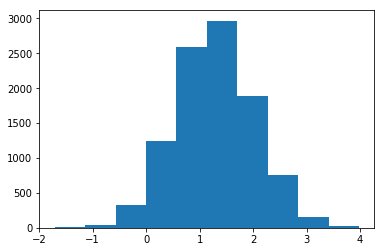

In [8]:
# plot sampling distribution
plt.hist(diffs)

In [10]:
# simulate distribution under the null hypothesis
null_vals =np.random.normal(0,diffs.std(),10000)

(array([  4.00000000e+01,   2.84000000e+02,   1.18000000e+03,
          2.49000000e+03,   3.02000000e+03,   2.04700000e+03,
          7.78000000e+02,   1.43000000e+02,   1.70000000e+01,
          1.00000000e+00]),
 array([-2.47976526, -1.90628735, -1.33280944, -0.75933154, -0.18585363,
         0.38762428,  0.96110218,  1.53458009,  2.108058  ,  2.6815359 ,
         3.25501381]),
 <a list of 10 Patch objects>)

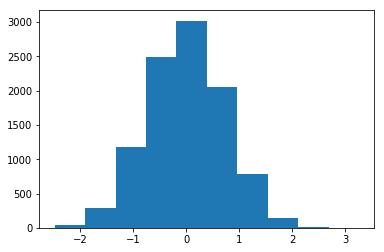

In [12]:
plt.hist(null_vals)

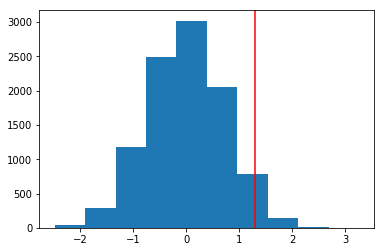

In [13]:
# plot null distribution

plt.hist(null_vals)
# plot line for observed statistic
plt.axvline(x=obs_diff,color='red')

In [ ]:
# compute p value


In [14]:
(null_vals>obs_diff).mean()

0.038399999999999997